<a href="https://colab.research.google.com/github/econ105/AI/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV as rcv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from IPython import get_ipython

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import numpy as np:
- import NumPy library for arrasy and metrices
- along with mathematical function

import pandas as pd
- import Pandas library for data manipulation and analysis
- provide data structures like dataframe(df) for data cleaning, etc

from sklearn.linear_model import Lasso:
- import the Lasso regression model from scikit-learn(sklearn)
- for regression tasks and L1 regularization

from sklearn.preprocessing import StandardScaler:
- used for standardizing features by removing mean and scaling to unit variance

from sklearn.pipeline import Pipeline
- used to chain multiple estimators into one

import matplotlib.pyplot as plt:
- for creating static, animated, and interactive visualization in Python

from IPython import get_ipython
- import the get_ipythin from IPython
- provide interactive computing and tools for authoring notebook

import yfinance as yf
- for downloading market data from Yahoo Finance

from pandas.plotting import register_matplotlib_converters:
- Imports the register_matplotlib_converters function from Pandas
- which registers converters for Pandas objects with matplotlib

register_matplotlib_converters():
- Calls the register_matplotlib_converters function to register converters for Pandas objects with matplotlib.

import matplotlib.pyplot as plt:
- Re-imports the matplotlib library for plotting graphs

from sklearn.neighbors import KNeighborsClassifier:
- for classification tasks based on the k-nearest neighbors algorithm.

from sklearn.metrics import accuracy_score
- to compute the accuracy classification score.

from pandas.plotting import register_matplotlib_converters
- used to register Pandas converters with Matplotlib to ensure proper handling of time series data when plotting with Matplotlib

register_matplotlib_converters():
- calls the register_matplotlib_converters function
- to ensure that Pandas converters are registered with Matplotlib
- help avoid warnings or errors related to date plotting and ensure that time series data is displayed correctly







In [ ]:
Tsla = yf.Ticker('Tsla')
Tsla = Tsla.history(period = 'max')
df=Tsla[['Open', 'High', 'Low', 'Close']]
df

,Open,High,Low,Close
Date,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000
...,...,...,...,...
2025-01-02 00:00:00-05:00,390.100006,392.730011,373.040009,379.279999
2025-01-03 00:00:00-05:00,381.480011,411.880005,379.450012,410.440002
2025-01-06 00:00:00-05:00,423.200012,426.429993,401.700012,411.049988


stock data is loaded from Yahoo Finance using yfinance
- Ticker refers to the stock tickers
- if you are using other stocks, please refers to the respective stock tickers
here using Tesla as example

Tsla = Tsla,history(period = 'max')
- the historital stock price data for Tesla(Tsla)
- period = max retreiven the historial data for the maximun available period
- if you want a specific period, change this line to
- Tsla = Tsla.history(start= 'yyyy-mm-dd', end = 'yyyy-mm-dd')

df = tsla[df = Tsla[['Open', 'High', 'Low', 'Close']]]
- a new dataframe named df is created cotaining the columns for 'Open', 'High', 'Low', and 'Close'
- not necessary, you can show all the historical data such as Volumn, dividend etc using the line: tsla to called to fectched data if you like
- finally df is usde to called the dataframe df


In [ ]:
# Predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
X.head()

<ipython-input-25-bf4a0db6452d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df.Open - df.Close
<ipython-input-25-bf4a0db6452d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High-Low'] = df.High - df.Low


,Open-Close,High-Low
Date,,
2010-06-29 00:00:00-04:00,-0.326000,0.497334
2010-06-30 00:00:00-04:00,0.130666,0.474667
2010-07-01 00:00:00-04:00,0.202667,0.376667
2010-07-02 00:00:00-04:00,0.253333,0.292667
2010-07-06 00:00:00-04:00,0.259333,0.278000


Predictor variable
- also known as independent variable is used to determine the value of the target variable.
- ‘Open-Close’ and ‘High-Low’ are used as predictor variables
- NaN values will be used and the  predictor variables are stored in ‘X’

df['Open-Close'] = df.Open - df.Close
- creates a new column in the DataFrame df named 'Open-Close', which calculates the price difference between the opening ('Open') and closing ('Close') prices for each day.

df['High-Low'] = df.High - df.Low
- creates another new column in the DataFrame df named 'High-Low'
- calculates the price difference between the daily high ('High') and low ('Low') prices.
df = df.dropna()
- removes any rows with missing values (NaN) from the DataFrame df

X = df[['Open-Close', 'High-Low']]
- creates a new DataFrame X containing only the columns 'Open-Close' and 'High-Low'
- These columns are selected as predictor variables

X.head()
- displays the first few rows of the DataFrame X, showing the predictor variables 'Open-Close'

In [ ]:
# Target variable
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

- target variable is the dependent variabl to be predicted by predictor variables
- the target variable ehre is whether Tesla price will close up or down on the next trading day
-if tomorrow's closing price is greater today's closing price, we will buy tesla, else we will sell it
- store the +1 for buy signal
- -1 for the sell signal
- store the target variable in 'Y'

df['Close'].shift(-1)
- shifts the 'Close' price column in the DataFrame df by one position upwards
- the current day's closing price is compared with the next day's closing price.
df['Close'].shift(-1) > df['Close']
- checks if the next day's closing price is greater than the current day's closing price
- It returns a boolean Series with True where the next day's closing price is higher and False otherwise.
np.where(condition, x, y)
- to assign values based on a condition
- If the condition df['Close'].shift(-1) > df['Close'] is True, the corresponding element in the array Y is assigned a value of 1
- If the condition is False, the corresponding element in the array Y is assigned a value of -1.

In [ ]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

the dataset is split into training dataset and test dataset using 70% of data to train and the rest 30% to test
- a split parameter is created which will fivide the dataframe in a 7-3 ratio
- the split ratio can be changed per choice

split_percentage = 0.7
- sets the percentage of data to be used for training the model to 70% (0.7), leaving 30% for testing.
split = int(split_percentage * len(df))
- calculates the index at which to split the dataset based on the specified percentage
- It finds 70% of the length of the DataFrame df and converts it to an integer.
X_train = X[:split]
- assigns the first split rows of the predictor variable DataFrame X to X_train, which will be used for training the model.
Y_train = Y[:split]
- assigns the corresponding target variable values for the training set to Y_train.
X_test = X[split:]
- assigns the remaining rows of the predictor variable DataFrame X after the split index to X_test
Y_test = Y[split:]
- assigns the corresponding target variable values for the test set to Y_test.

In [ ]:
# Instantiate KNN learning model
#value of k can be changed

knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.59
Test_data Accuracy: 0.51


- after spliting the dataset into training and test dataset, k-nearest classified will be instantiated
- k=15 is used here, which the value of k can be changed according
- the trained data is fit by using the 'fit' function
the train and test accuracy will be calculated using the 'accuracy_score' function

knn = KNeighborsClassifier(n_neighbors=15)
- initializes a K-Nearest Neighbors classifier (KNeighborsClassifier) object with n_neighbors set to 15
- This specifies that the classifier will consider 15 nearest neighbors when making predictions.
knn.fit(X_train, Y_train)
- fits the K-Nearest Neighbors model on the training data
- The fit() method trains the model on the provided training data (X_train as features and Y_train as target labels)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
- calculates the accuracy of the model on the training set
- It compares the predicted labels generated by the model on the training features (X_train) with the actual training target labels (Y_train) using the accuracy_score function.
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
- calculates the accuracy of the model on the test set
- It compares the predicted labels generated by the model on the test features (X_test) with the actual test target labels (Y_test) using the accuracy_score function.
print ('Train_data Accuracy: %.2f' %accuracy_train)
- prints the accuracy of the model on the training set with a precision of two decimal places.
print ('Test_data Accuracy: %.2f' %accuracy_test)
- prints the accuracy of the model on the test set with a precision of two decimal places.
- we will that an accuracy of 50% in a test data
- 50% of the time the prediction will be correct

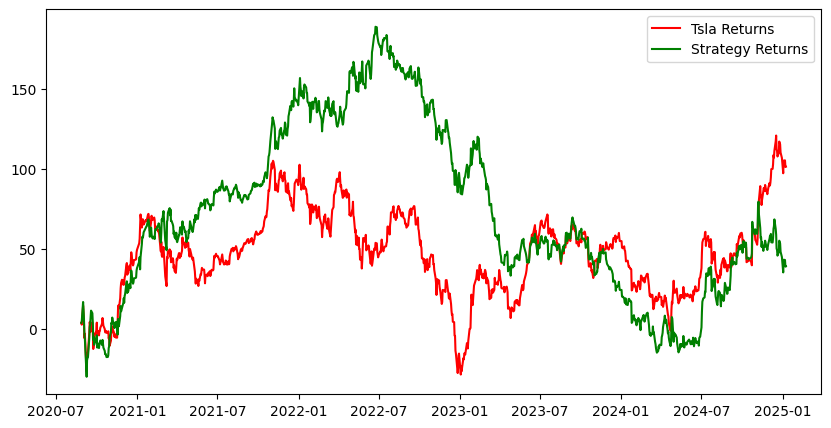

In [ ]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# AAPL Cumulative Returns
df['Tsla_data_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Tsla_data_returns = df[split:]['Tsla_data_returns'].cumsum()*100

# Cumulative Strategy Returns
df['Strategy_returns'] = df['Tsla_data_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Strategy_returns'].cumsum()*100

# Plot the results to visualise the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Tsla_data_returns, color='r',label = 'Tsla Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

- the trading stratery is to buy or sell
- predict the signla to buy or sell using the predict function
- then, we will calculate the cumulative Tsla returns for the etst period
- next, we will calculate the cumulative stratety return based on the signal predicted
- the Tsla return and cumulative strategy returns are plotted and visualize the perofrmace of the trading strategy based on KNN Algorithm
-the graph compare the performance of Tesla(red line) with trading strategy's cumulative returns(green line)

df['Predicted_Signal'] = knn.predict(X)
- This line adds a new column called 'Predicted_Signal' to the DataFrame df
- which contains the predicted signals generated by the K-Nearest Neighbors model (knn) on the entire dataset X.

df['Tsla_data_returns'] = np.log(df['Close'] / df['Close'].shift(1)
- calculates the daily log returns of the 'Close' price of the stock, 'TSLA'
- and stores these returns in a new column 'Tsla_data_returns' in the DataFrame df.

Cumulative_Tsla_data_returns = df[split:]['Tsla_data_returns'].cumsum()*100
- calculates the cumulative returns of the 'TSLA' stock from the split index to the end of the dataset
- and stores it in the variable Cumulative_Tsla_data_returns.

df['Strategy_returns'] = df['Tsla_data_returns'] * df['Predicted_Signal'].shift(1)
- calculates the strategy returns by multiplying the daily stock returns with the lagged predicted signals
- The results are stored in a new column 'Strategy_returns' in the DataFrame df.

Cumulative_Strategy_returns = df[split:]['Strategy_returns'].cumsum()*100:
- calculates the cumulative returns of the trading strategy from the split index to the end of the dataset
- and stores it in the variable Cumulative_Strategy_returns.

plt.figure(figsize=(10,5))
- Sets the figure size for the plot

plt.plot(Cumulative_Tsla_data_returns, color='r', label='TSLA Returns')
- Plots the cumulative TSLA stock returns in red.

plt.plot(Cumulative_Strategy_returns, color='g', label='Strategy Returns'
- Plots the cumulative strategy returns in green.
plt.legend()
- Displays the legend on the plot.
plt.show()
- Shows the plot with the cumulative returns of the 'TSLA' stock and the trading strategy.

In [ ]:
# Calculate Sharpe ratio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns - Cumulative_Tsla_data_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.47


Sharpe ratio
- return earned in excess of the market reutn per unit of volatility

- first calculate the standard deviation(std) of the cumulative returns
- use it to further to calculate the Sharpe ratio